In [147]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [11]:
import numpy as np
from skimage.io import imshow
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.datasets import fetch_lfw_people

In [35]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

In [22]:
def plot_gallery(images, h, w, n_row=3, n_col=4, titles=None):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        if titles != None:
            plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [13]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.8)

In [14]:
lfw_people.images.shape

(1288, 100, 75)

In [15]:
n_samples, h, w = lfw_people.images.shape

In [16]:
X = lfw_people.data

In [17]:
X.shape

(1288, 7500)

In [18]:
n_features = X.shape[1]

In [19]:
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [30]:
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)
print(target_names)

n_samples: 1288
n_features: 7500
n_classes: 7
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


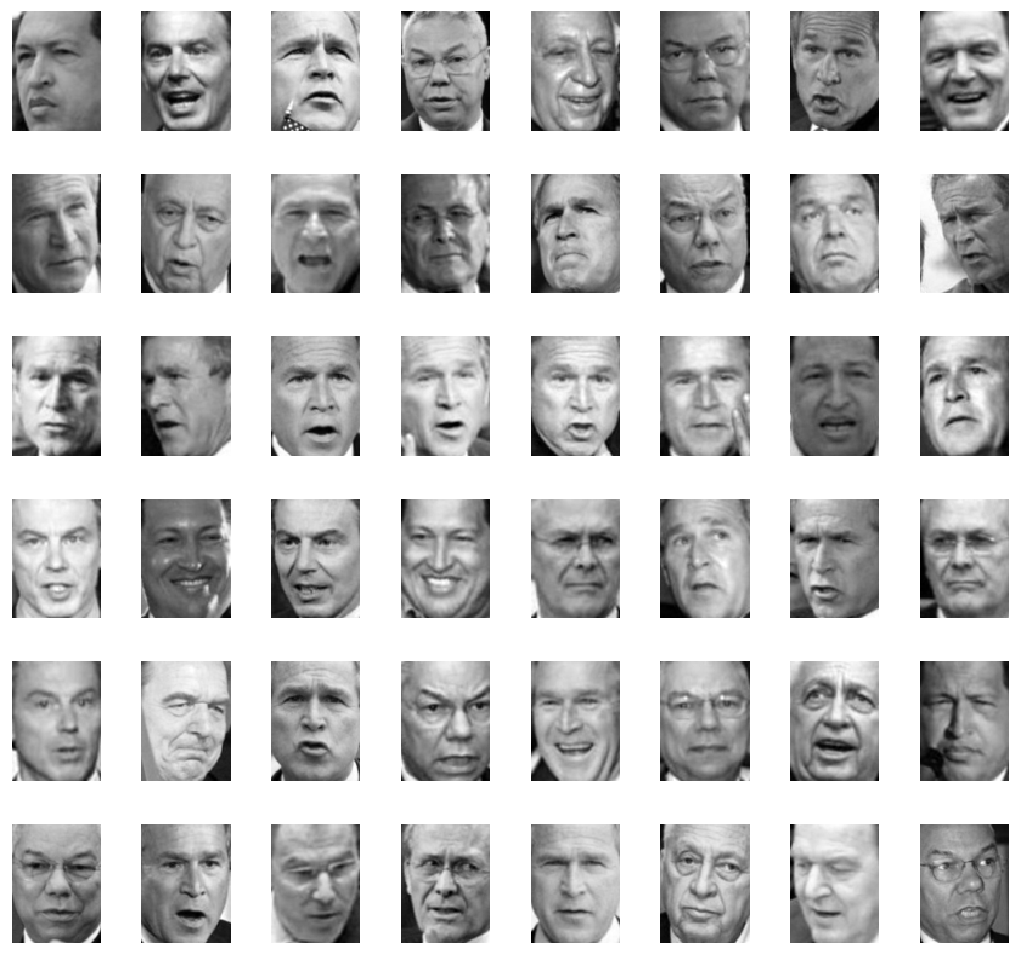

In [25]:
plot_gallery(X, h, w, n_row=6, n_col=8)

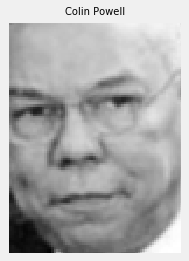

In [69]:
i = 610
plt.figure(figsize=(4,4))
plt.imshow(X[i, :].reshape((h, w)), interpolation='nearest', cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.title(target_names[y[i]])
plt.show()

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print("Xtrain:",X_train.shape)
print("X_test:",X_test.shape)

Xtrain: (966, 7500)
X_test: (322, 7500)


Calcola PCA sul training set

In [57]:
n_components = 150

In [172]:
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

In [173]:
eigenfaces = pca.components_.reshape((n_components, h, w))

In [174]:
eigenfaces.shape

(150, 100, 75)

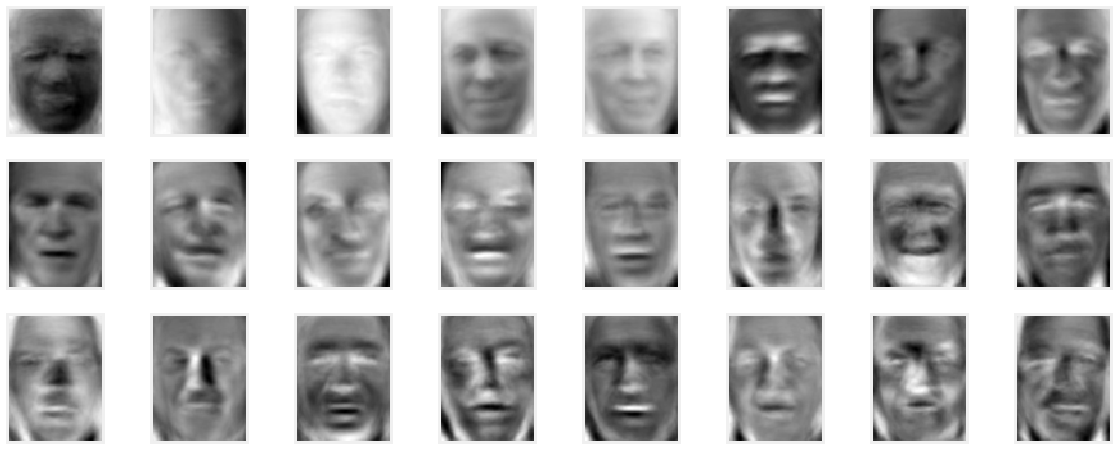

In [175]:
fig, axes = plt.subplots(3, 8, figsize=(18, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(100, 75), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())

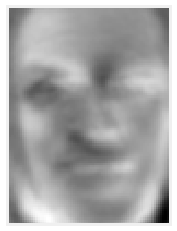

In [176]:
i = 10
plt.figure(figsize=(4,4))
plt.imshow(eigenfaces[i], cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

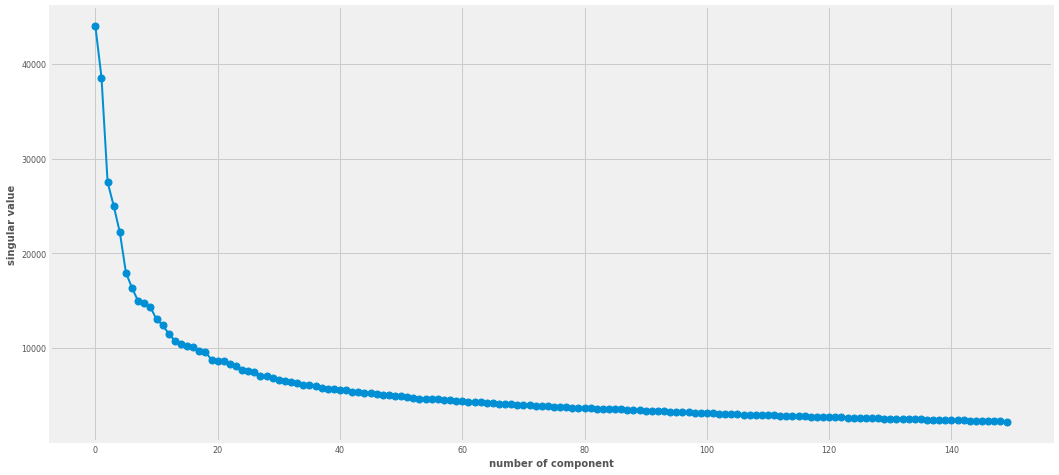

In [177]:
plt.figure(figsize=(16,8))
plt.plot(pca.singular_values_, marker='o', markersize=7)
plt.xlabel('number of component')
plt.ylabel('singular value')
plt.show()

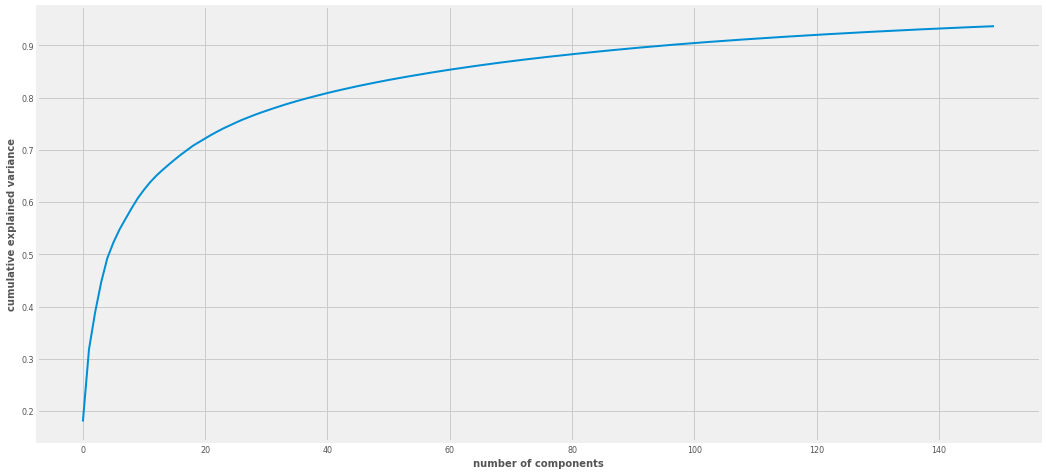

In [178]:
plt.figure(figsize=(16,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

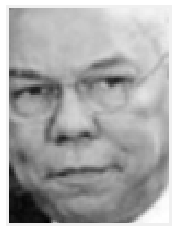

In [179]:
i = 610
plt.figure(figsize=(4,4))
plt.imshow(X[i, :].reshape((h, w)), interpolation='nearest', cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

In [180]:
pca1 = PCA(n_components=10, svd_solver='randomized', whiten=True).fit(X_train)
f = pca1.transform(X[i,:].reshape(1,-1))
f1 = pca1.inverse_transform(f)

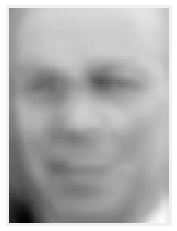

In [181]:
plt.figure(figsize=(4,4))
plt.imshow(f1.reshape(h,w), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

In [182]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [206]:
X_train_rec = pca.inverse_transform(X_train_pca)

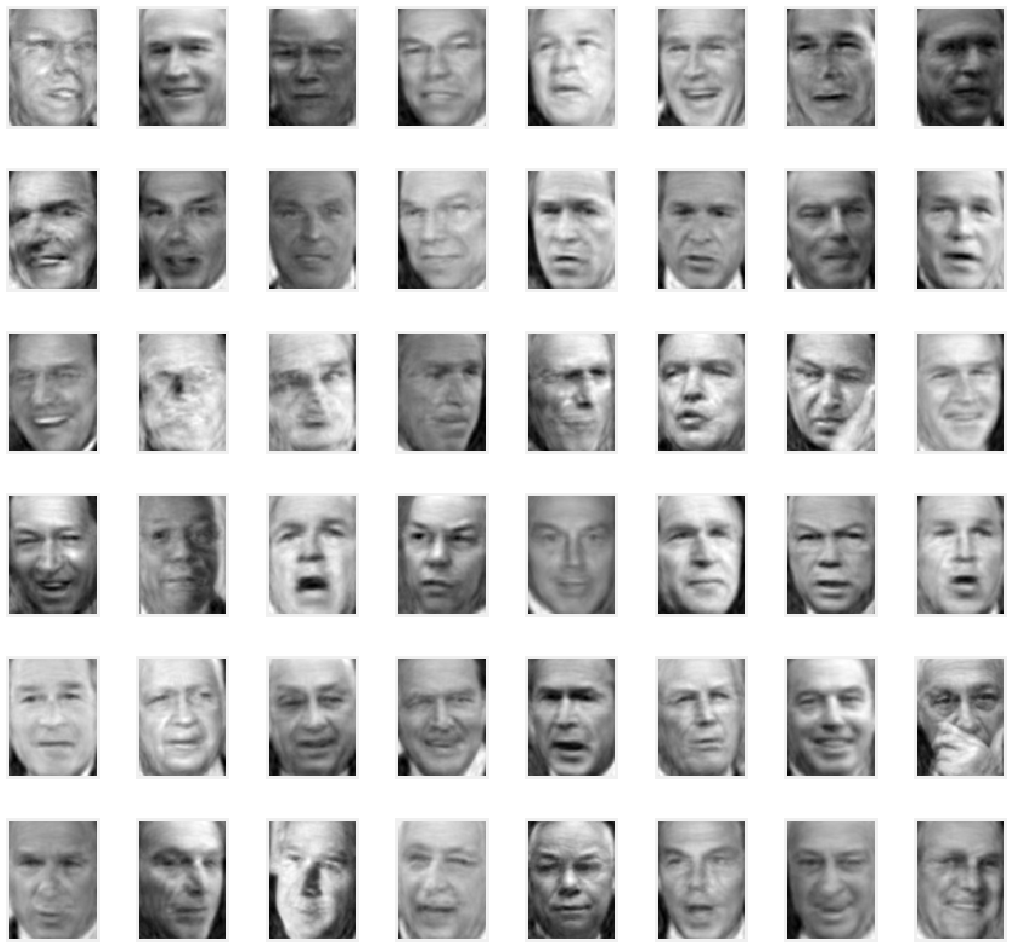

In [207]:
plot_gallery(X_train_rec, h, w, n_row=6, n_col=8)

In [201]:
param_grid = {'C': [7.5e1, 1e2, 2.5e2],
              'gamma': [0.0012, 0.00125, 0.0013] }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, scoring='accuracy')
clf = clf.fit(X_train_pca, y_train)

In [202]:
best_params = clf.best_params_
best_score = clf.best_score_
print('C = {0:5.3f}, gamma = {1:5.3f}, accuracy = {2:5.3f}'.format(best_params['C'], best_params['gamma'], best_score))

C = 75.000, gamma = 0.001, accuracy = 0.803


In [200]:
y_pred = clf.predict(X_test_pca)

print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

                   precision    recall  f1-score   support

     Ariel Sharon       0.81      0.65      0.72        20
     Colin Powell       0.80      0.91      0.85        57
  Donald Rumsfeld       0.76      0.78      0.77        32
    George W Bush       0.84      0.88      0.86       128
Gerhard Schroeder       0.78      0.75      0.76        28
      Hugo Chavez       0.86      0.67      0.75        18
       Tony Blair       0.84      0.69      0.76        39

        micro avg       0.82      0.82      0.82       322
        macro avg       0.81      0.76      0.78       322
     weighted avg       0.82      0.82      0.81       322

[[ 13   4   3   0   0   0   0]
 [  0  52   0   3   0   1   1]
 [  0   1  25   4   0   0   2]
 [  2   6   3 113   2   1   1]
 [  0   0   1   5  21   0   1]
 [  0   1   0   2   3  12   0]
 [  1   1   1   8   1   0  27]]


In [204]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

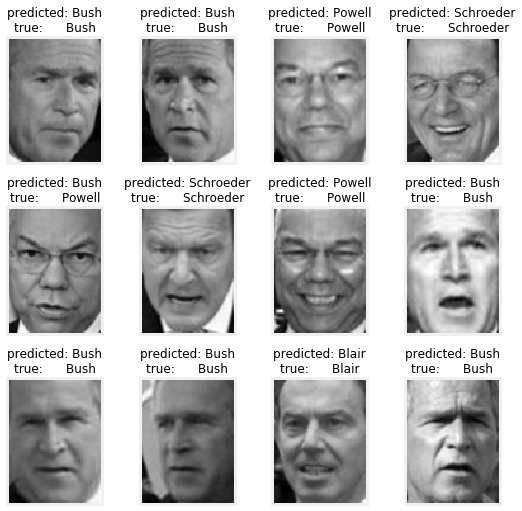

In [205]:
prediction_titles = [title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])]

plot_gallery(X_test, h, w, titles=prediction_titles)

In [208]:
pca2 = PCA(n_components=2, svd_solver='randomized', whiten=True).fit(X_train)
X_train_2 = pca2.transform(X_train) 
X_test_2 = pca2.transform(X_test) 

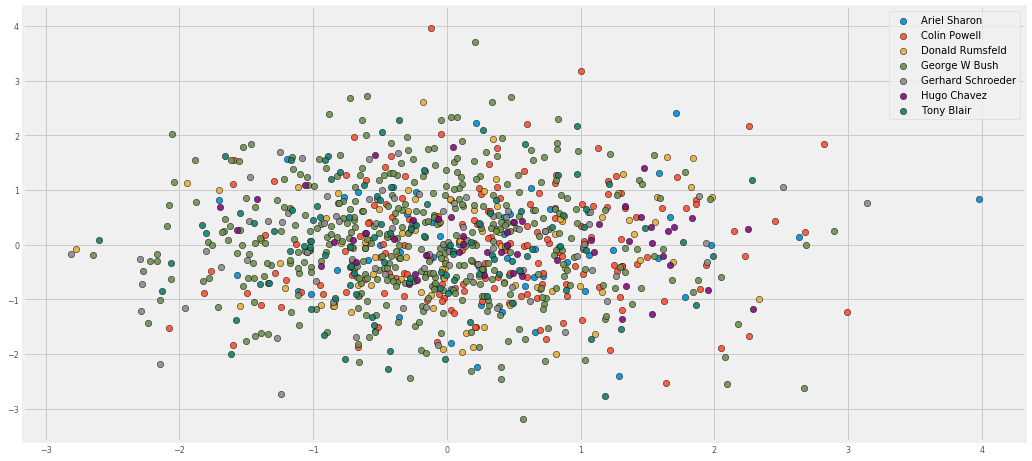

In [216]:
fig = plt.figure(figsize=(16,8))
for i in range(7):
    idx = np.where(y_train == i)
    plt.scatter(X_train_2[idx, 0], X_train_2[idx, 1], c=colors[i], s=40, edgecolors='k', 
                alpha = .9, label='{0:s}'.format(target_names[i]),cmap=cmap)
plt.legend()
plt.show()

In [223]:
param_grid = {'C': [7.5e1, 1e2, 2.5e2],'gamma': [0.0012, 0.00125, 0.0013] }
clf2 = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, scoring='accuracy')
clf2 = clf.fit(X_train_2, y_train)

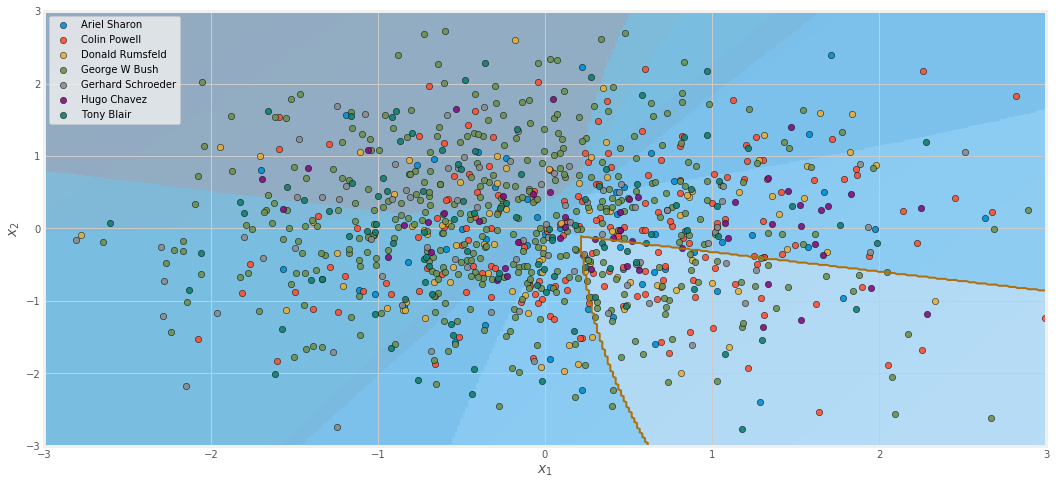

In [248]:
xx, yy = np.meshgrid(np.linspace(-4, 4, 500), np.linspace(-4, 4, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:,3].reshape(xx.shape)

fig = plt.figure(figsize=(16,8))
fig.patch.set_facecolor('white')
ax = fig.gca()
imshow_handle = plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', alpha=.5, cmap=cmap)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linetypes='--', colors=[colors[9]])
for i in range(7):
    idx = np.where(y_train == i)
    plt.scatter(X_train_2[idx, 0], X_train_2[idx, 1], c=colors[i], s=40, edgecolors='k', 
                alpha = .9, label='{0:s}'.format(target_names[i]),cmap=cmap)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.legend()
plt.show()